In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [25]:
train = pd.read_csv('WDBC_PCA10_Train.csv')
valid = pd.read_csv('WDBC_PCA10_Validation.csv')
test = pd.read_csv('WDBC_PCA10_Test.csv')

In [26]:
X_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values


X_valid = valid.iloc[:,1:].values
y_valid = valid.iloc[:,0].values


X_test = test.iloc[:,1:].values
y_test = test.iloc[:,0].values

In [27]:
X_train = torch.tensor(X_train,dtype = torch.float32)
y_train = torch.tensor(y_train,dtype = torch.float32).view(-1,1)


X_valid = torch.tensor(X_valid,dtype = torch.float32)
y_valid = torch.tensor(y_valid,dtype = torch.float32).view(-1,1)


X_test = torch.tensor(X_test,dtype = torch.float32)
y_test = torch.tensor(y_test,dtype = torch.float32).view(-1,1)


In [28]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)


In [29]:
# model = NeuralNet(input_size=30, hidden1=128, hidden2=32)
# criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)

# for epoch in range(epochs):
#         for (inputs, labels) in zip(X_train, y_train):
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#         print(loss)

In [30]:
l1 = [10, 100, 64, 512]
a1 = [64, 128, 256, 512]
a2 = [16, 32, 64 ,128]

In [31]:
loss_list =[]

In [32]:
def performance(model_name, y_true, y_pred):
    print(f"Performance for {model_name}:\n")
    print(f"Confusion matrix: \n{confusion_matrix(y_true,y_pred)}")
    print(f"Accuracy: \t{accuracy_score(y_true, y_pred)}")
    print(f"Precision: \t{precision_score(y_true, y_pred)}")
    print(f"Recall: \t{recall_score(y_true, y_pred)}")
    print(f"F1-score: \t{f1_score(y_true, y_pred)}\n\n")

In [33]:
epochs = 100

In [34]:
for h1 in l1:
    model = NeuralNet(input_size=10, hidden1=h1, hidden2=0)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.0001)
    loss_list_temp =[]
    for epoch in range(epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_list_temp.append(loss.item())
    print("Iteration completed")
    loss_list.append(loss_list_temp)
    model.eval()
    with torch.no_grad():
        y_valid_out = model(X_valid)
        y_valid_pred = (y_valid_out>=0.5).float()
    with torch.no_grad():
        y_test_out = model(X_test)
        y_test_pred = (y_test_out>=0.5).float()

    y_valid_pred = y_valid_pred.numpy()    
    y_test_pred = y_test_pred.numpy()    
    print("For architecture\n\n")
    performance("Validation data", y_valid, y_valid_pred)
    performance("Test data", y_test, y_test_pred)

/home/user/.local/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
/home/user/.local/lib/pyth

Iteration completed
For architecture


Performance for Validation data:

Confusion matrix: 
[[71  0]
 [43  0]]
Accuracy: 	0.6228070175438597
Precision: 	0.0
Recall: 	0.0
F1-score: 	0.0


Performance for Test data:

Confusion matrix: 
[[72  0]
 [42  0]]
Accuracy: 	0.631578947368421
Precision: 	0.0
Recall: 	0.0
F1-score: 	0.0


Iteration completed
For architecture


Performance for Validation data:

Confusion matrix: 
[[71  0]
 [43  0]]
Accuracy: 	0.6228070175438597
Precision: 	0.0
Recall: 	0.0
F1-score: 	0.0


Performance for Test data:

Confusion matrix: 
[[72  0]
 [42  0]]
Accuracy: 	0.631578947368421
Precision: 	0.0
Recall: 	0.0
F1-score: 	0.0


Iteration completed
For architecture


Performance for Validation data:

Confusion matrix: 
[[71  0]
 [43  0]]
Accuracy: 	0.6228070175438597
Precision: 	0.0
Recall: 	0.0
F1-score: 	0.0


Performance for Test data:

Confusion matrix: 
[[72  0]
 [42  0]]
Accuracy: 	0.631578947368421
Precision: 	0.0
Recall: 	0.0
F1-score: 	0.0


Iteration comple

/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter 

In [35]:
loss_list2 =[]

In [39]:
for (h1, h2) in zip(a1, a2):
    model = NeuralNet(input_size=10, hidden1=h1, hidden2=h2)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.0001)
    loss_list_temp =[]
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        loss_list_temp.append(loss.item())
    print("Iteration completed")
    loss_list2.append(loss_list_temp)
    model.eval()
    with torch.no_grad():
        y_valid_out = model(X_valid)
        y_valid_pred = (y_valid_out>=0.5).float()
    
        y_test_out = model(X_test)
        y_test_pred = (y_test_out>=0.5).float()

        print("For architecture\n\n")
        performance("Validation data", y_valid, y_valid_pred)
        performance("Test data", y_test, y_test_pred)

Iteration completed
For architecture


Performance for Validation data:

Confusion matrix: 
[[ 2 69]
 [35  8]]
Accuracy: 	0.08771929824561403
Precision: 	0.1038961038961039
Recall: 	0.18604651162790697
F1-score: 	0.1333333333333333


Performance for Test data:

Confusion matrix: 
[[ 4 68]
 [34  8]]
Accuracy: 	0.10526315789473684
Precision: 	0.10526315789473684
Recall: 	0.19047619047619047
F1-score: 	0.13559322033898305


Iteration completed
For architecture


Performance for Validation data:

Confusion matrix: 
[[71  0]
 [43  0]]
Accuracy: 	0.6228070175438597
Precision: 	0.0
Recall: 	0.0
F1-score: 	0.0


Performance for Test data:

Confusion matrix: 
[[72  0]
 [42  0]]
Accuracy: 	0.631578947368421
Precision: 	0.0
Recall: 	0.0
F1-score: 	0.0




/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration completed
For architecture


Performance for Validation data:

Confusion matrix: 
[[ 0 71]
 [ 0 43]]
Accuracy: 	0.37719298245614036
Precision: 	0.37719298245614036
Recall: 	1.0
F1-score: 	0.5477707006369427


Performance for Test data:

Confusion matrix: 
[[ 0 72]
 [ 0 42]]
Accuracy: 	0.3684210526315789
Precision: 	0.3684210526315789
Recall: 	1.0
F1-score: 	0.5384615384615384


Iteration completed
For architecture


Performance for Validation data:

Confusion matrix: 
[[ 0 71]
 [ 0 43]]
Accuracy: 	0.37719298245614036
Precision: 	0.37719298245614036
Recall: 	1.0
F1-score: 	0.5477707006369427


Performance for Test data:

Confusion matrix: 
[[ 0 72]
 [ 0 42]]
Accuracy: 	0.3684210526315789
Precision: 	0.3684210526315789
Recall: 	1.0
F1-score: 	0.5384615384615384




In [40]:
loss_list[0]
epoch_list = []
for e in range(epochs):
    epoch_list.append(e+1)

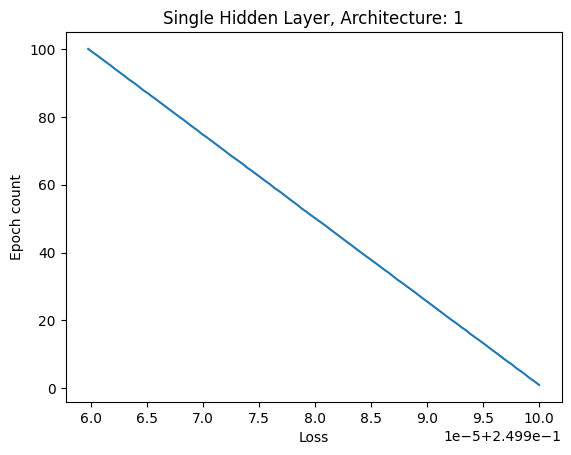

In [41]:
x1 = loss_list[0]
x2 = epoch_list
plt.plot(x1, x2)
plt.xlabel("Loss")
plt.ylabel("Epoch count")
plt.title("Single Hidden Layer, Architecture: 1")
plt.show()

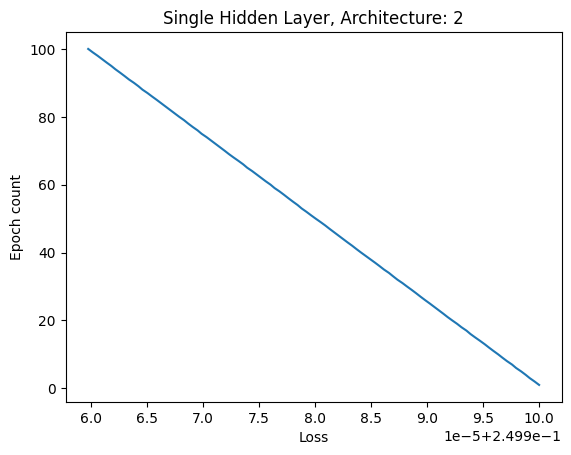

In [42]:
x1 = loss_list[1]
x2 = epoch_list
plt.plot(x1, x2)
plt.xlabel("Loss")
plt.ylabel("Epoch count")
plt.title("Single Hidden Layer, Architecture: 2")
plt.show()

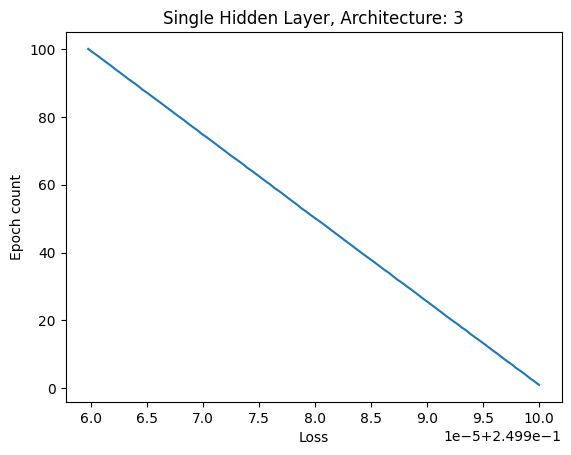

In [43]:
x1 = loss_list[2]
x2 = epoch_list
plt.plot(x1, x2)
plt.xlabel("Loss")
plt.ylabel("Epoch count")
plt.title("Single Hidden Layer, Architecture: 3")
plt.show()

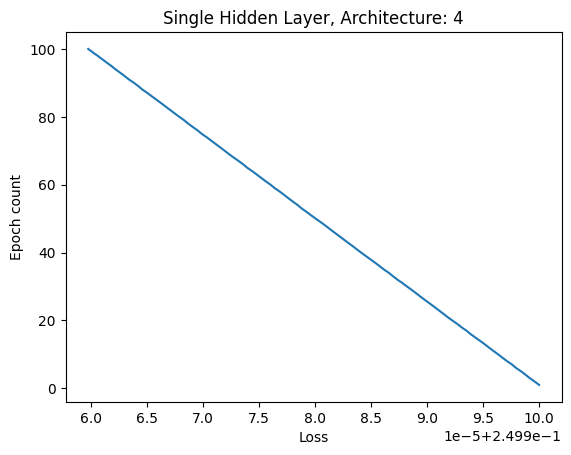

In [44]:
x1 = loss_list[3]
x2 = epoch_list
plt.plot(x1, x2)
plt.xlabel("Loss")
plt.ylabel("Epoch count")
plt.title("Single Hidden Layer, Architecture: 4")
plt.show()

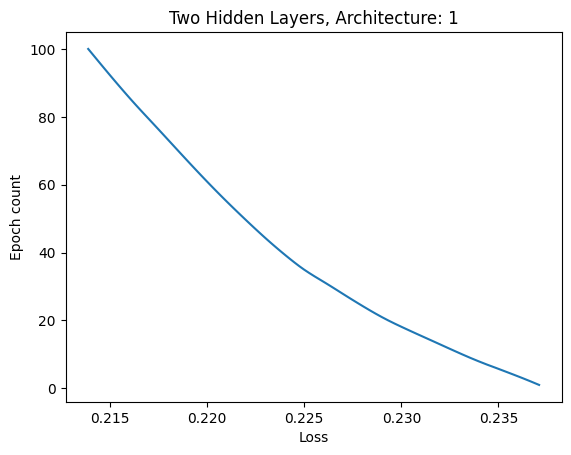

In [45]:
x1 = loss_list2[0]
x2 = epoch_list
plt.plot(x1, x2)
plt.xlabel("Loss")
plt.ylabel("Epoch count")
plt.title("Two Hidden Layers, Architecture: 1")
plt.show()

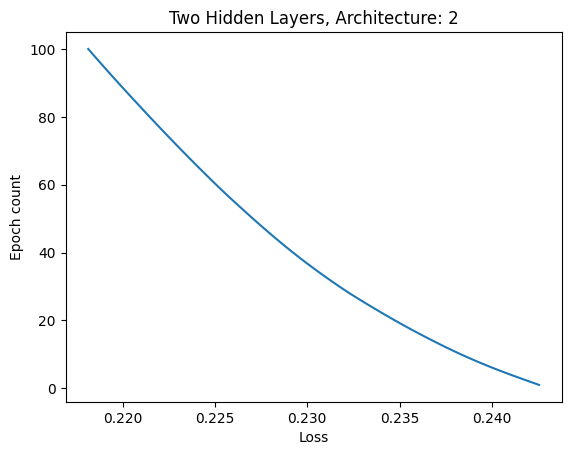

In [46]:
x1 = loss_list2[1]
x2 = epoch_list
plt.plot(x1, x2)
plt.xlabel("Loss")
plt.ylabel("Epoch count")
plt.title("Two Hidden Layers, Architecture: 2")
plt.show()

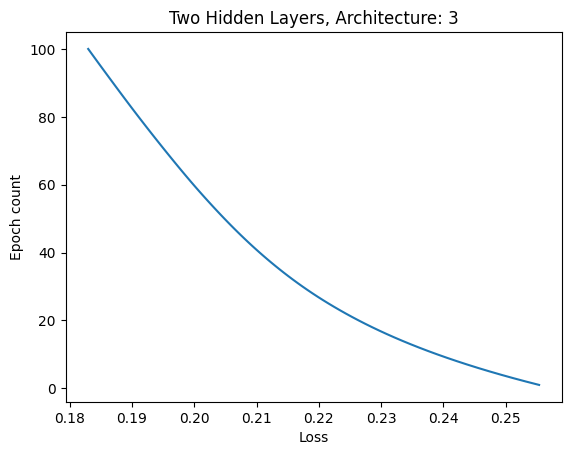

In [47]:
x1 = loss_list2[2]
x2 = epoch_list
plt.plot(x1, x2)
plt.xlabel("Loss")
plt.ylabel("Epoch count")
plt.title("Two Hidden Layers, Architecture: 3")
plt.show()

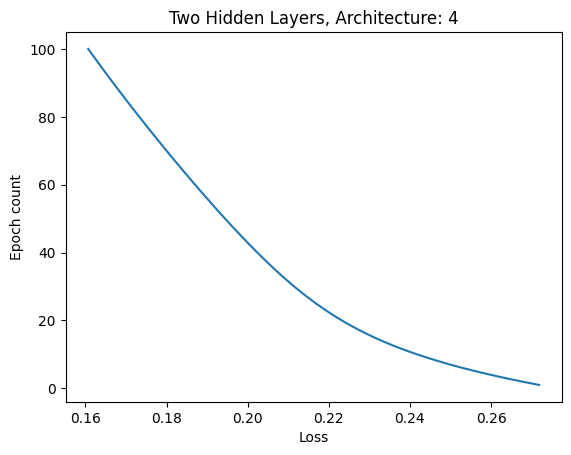

In [48]:
x1 = loss_list2[3]
x2 = epoch_list
plt.plot(x1, x2)
plt.xlabel("Loss")
plt.ylabel("Epoch count")
plt.title("Two Hidden Layers, Architecture: 4")
plt.show()